In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# Import Models for Comparison
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Configuration
csv_file_path = "corrected_crop_dataset.csv" 

# Set visual style
sns.set_style("whitegrid")

print("✅ Libraries loaded successfully.")

✅ Libraries loaded successfully.


In [2]:
print("⏳ Loading dataset...")

try:
    df = pd.read_csv(csv_file_path)
    
    # CLEANING: Strip extra spaces from text columns (Important for user inputs later)
    df['state'] = df['state'].str.strip()
    df['district'] = df['district'].str.strip()
    df['soil_type'] = df['soil_type'].str.strip()
    
    print(f"✅ Data loaded successfully! Shape: {df.shape}")
    print("\n--- First 5 Rows ---")
    display(df.head())

except FileNotFoundError:
    print("❌ Error: 'corrected_crop_dataset.csv' not found.")

⏳ Loading dataset...
✅ Data loaded successfully! Shape: (4600, 16)

--- First 5 Rows ---


,state,district,N,P,K,pH,organic_carbon,soil_moisture,soil_type,temperature_c,humidity_pct,rainfall_mm,wind_speed_ms,solar_radiation_wm2,evapotranspiration_mm,crop
0,Uttar Pradesh,Chandauli,61.0,45.9,67.9,6.11,0.78,31.4,Clayey,16.1,69.8,53.6,1.71,151.40,3.51,Onion
1,Maharashtra,Beed,47.3,49.2,46.5,6.23,0.72,30.8,Black Cotton,24.5,68.4,62.0,2.35,189.45,3.04,Tobacco
2,Bihar,Bhojpur,30.7,77.6,38.1,6.31,0.73,18.9,Laterite,28.0,42.0,55.9,3.22,189.28,4.50,Soybean
3,Rajasthan,Rajsamand,71.4,45.2,43.9,6.56,0.33,37.6,Sandy,26.3,83.6,245.1,2.59,208.25,5.31,Rice
4,Rajasthan,Churu,26.6,72.9,40.8,6.96,0.61,12.5,Sandy,20.8,27.7,31.7,1.07,189.61,3.90,Bengal Gram


In [3]:
print("--- Dataset Information ---")
df.info()

print("\n--- Checking for Null Values ---")
if df.isnull().sum().sum() == 0:
    print("✅ No missing values found!")
else:
    print(df.isnull().sum())

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  4600 non-null   object 
 1   district               4600 non-null   object 
 2   N                      4600 non-null   float64
 3   P                      4600 non-null   float64
 4   K                      4600 non-null   float64
 5   pH                     4600 non-null   float64
 6   organic_carbon         4600 non-null   float64
 7   soil_moisture          4600 non-null   float64
 8   soil_type              4600 non-null   object 
 9   temperature_c          4600 non-null   float64
 10  humidity_pct           4600 non-null   float64
 11  rainfall_mm            4600 non-null   float64
 12  wind_speed_ms          4600 non-null   float64
 13  solar_radiation_wm2    4600 non-null   float64
 14  evapotranspiration_mm  4600 

crop
Onion          200
Tobacco        200
Soybean        200
Rice           200
Bengal Gram    200
Sugarcane      200
Banana         200
Tomato         200
Toor           200
Moong          200
Sunflower      200
Bajra          200
Wheat          200
Ragi           200
Maize          200
Urad           200
Groundnut      200
Coconut        200
Cotton         200
Mirchi         200
Mustard        200
Sorghum        200
Potato         200
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_17764\3062566451.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='crop', order=crop_counts.index, palette='viridis')


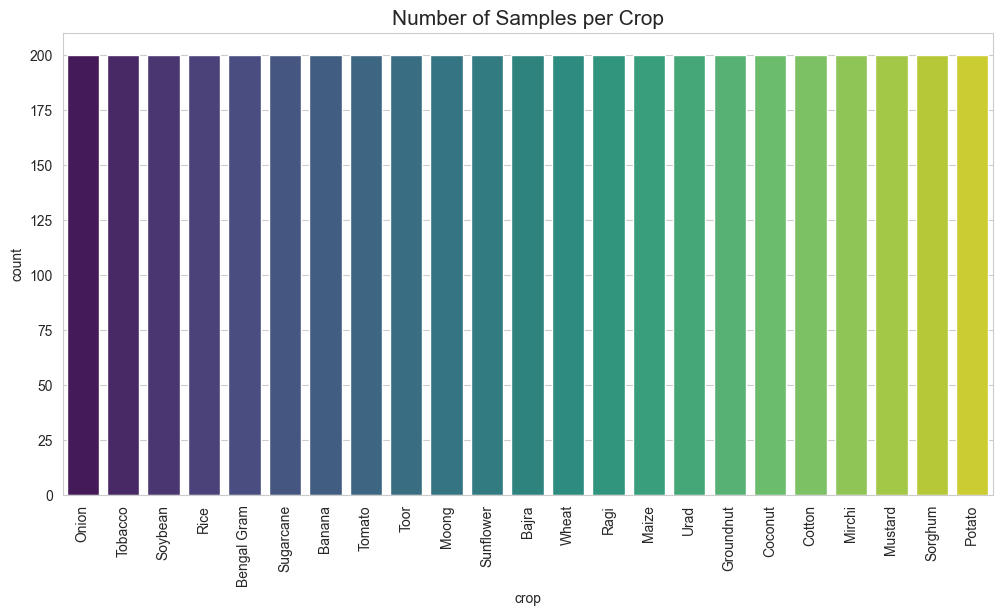

✅ Total Unique Crops: 23


In [6]:
plt.figure(figsize=(12, 6))
crop_counts = df['crop'].value_counts()
print(crop_counts)

sns.countplot(data=df, x='crop', order=crop_counts.index, palette='viridis')
plt.xticks(rotation=90)
plt.title("Number of Samples per Crop", fontsize=15)
plt.show()

print(f"✅ Total Unique Crops: {df['crop'].nunique()}")

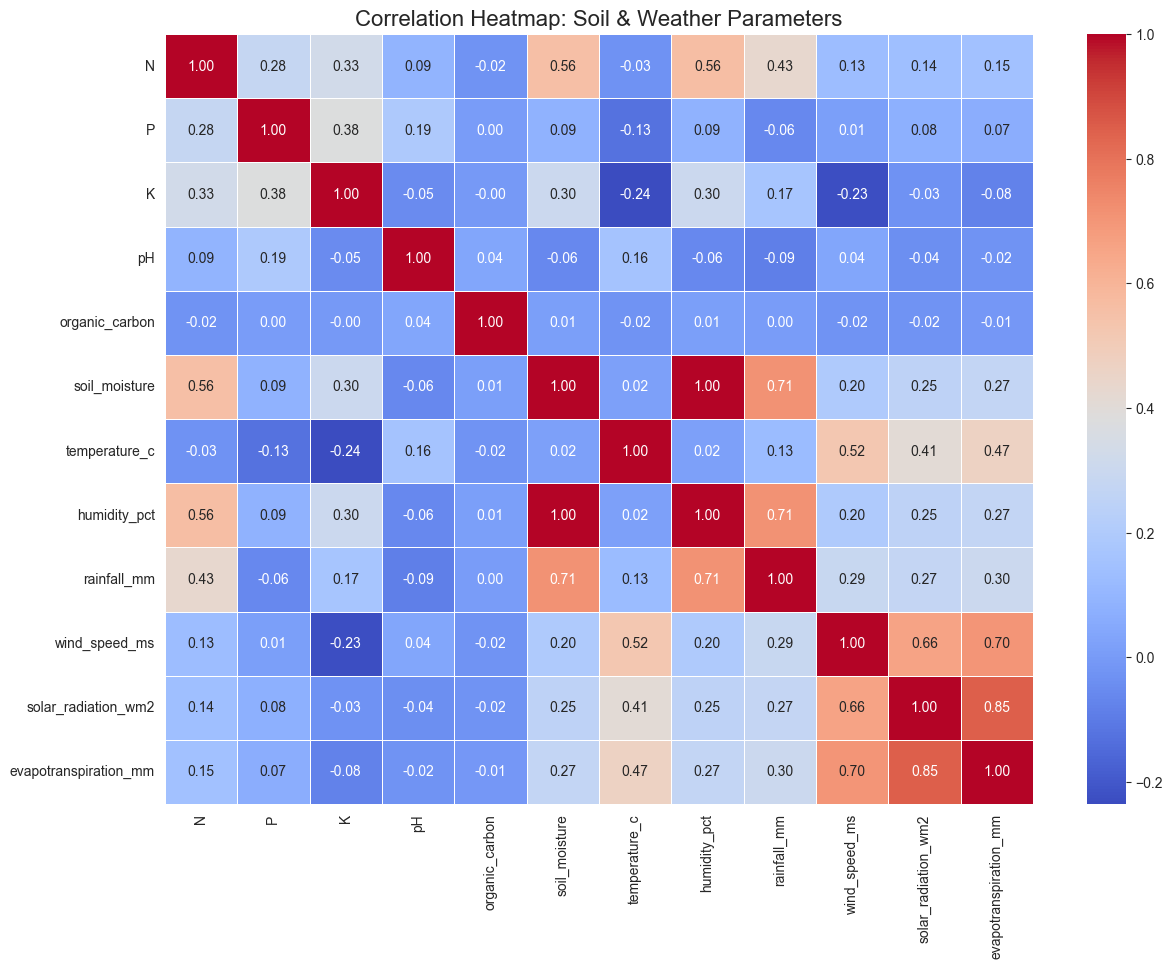

In [7]:
# --- Feature Correlation Analysis ---

# 1. Select ONLY numerical columns
# (Correlation only works on numbers, so we drop State, District, and Crop names for this plot)
numeric_df = df.select_dtypes(include='number')

# 2. Calculate the Correlation Matrix
corr_matrix = numeric_df.corr()

# 3. Plot the Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, 
            annot=True,        # Show numbers in boxes
            fmt=".2f",         # 2 decimal places
            cmap='coolwarm',   # Red = High Correlation, Blue = Low
            linewidths=0.5)

plt.title("Correlation Heatmap: Soil & Weather Parameters", fontsize=16)
plt.show()

# --- Insights ---
# If a value is close to 1.0 (Dark Red), those two features increase together.
# If a value is close to -1.0 (Dark Blue), one goes up while the other goes down.

Nitrogen (N) Statistics:
count    4600.000000
mean       51.076565
std        28.231376
min        10.100000
25%        30.100000
50%        44.100000
75%        63.300000
max       139.900000
Name: N, dtype: float64


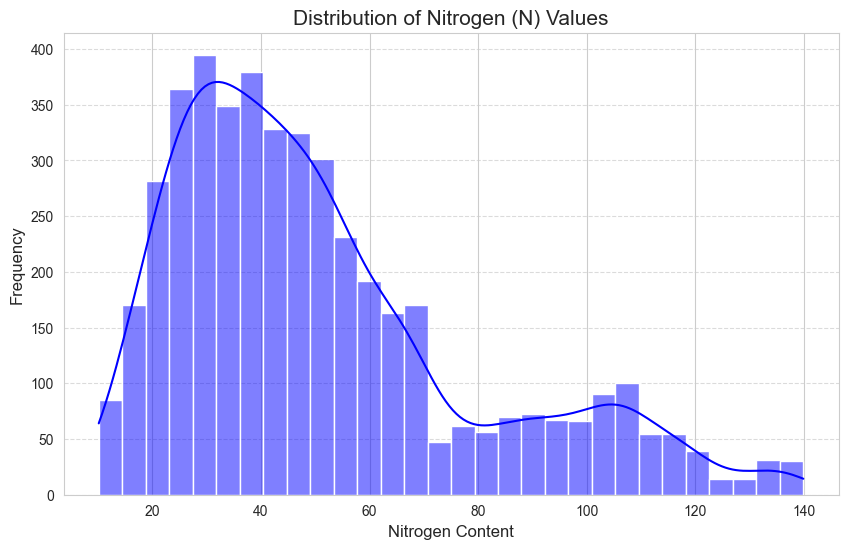

In [8]:


# 1. Calculate Descriptive Statistics
nitrogen_stats = df['N'].describe()
print("Nitrogen (N) Statistics:")
print(nitrogen_stats)

# 2. Visualize the Distribution
plt.figure(figsize=(10, 6))

# Create a histogram with a Kernel Density Estimate (KDE) line
sns.histplot(df['N'], kde=True, color='blue', bins=30)

plt.title('Distribution of Nitrogen (N) Values', fontsize=15)
plt.xlabel('Nitrogen Content', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [13]:
# Cell 7: Preprocessing & Train-Test Split
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# 1. Define Features (X) and Target (y)
# Note: matching exact column names from your CSV
numerical_cols = [
    'N', 'P', 'K', 'pH', 'organic_carbon', 'soil_moisture', 
    'temperature_c', 'humidity_pct', 'rainfall_mm', 
    'wind_speed_ms', 'solar_radiation_wm2', 'evapotranspiration_mm'
]
categorical_cols = ['state', 'district', 'soil_type']

X = df[numerical_cols + categorical_cols]
y = df['crop']

# 2. Encode Target Labels (Text -> Numbers)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
joblib.dump(le, 'label_encoder.pkl') # Save for later use in App
print("✅ Label Encoder saved.")

# 3. Create Preprocessing Pipeline
# CRITICAL FIX: sparse_output=False is required for Naive Bayes to work
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ])

# 4. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"✅ Data Preprocessing Complete.")
print(f"   Training Data: {X_train.shape}")
print(f"   Testing Data:  {X_test.shape}")

✅ Label Encoder saved.
✅ Data Preprocessing Complete.
   Training Data: (3680, 15)
   Testing Data:  (920, 15)


⏳ Training 9 models... This might take a minute or two.

   ✅ Logistic Regression finished.
   ✅ Naive Bayes finished.
   ✅ Support Vector Machine finished.
   ✅ K-Nearest Neighbors finished.
   ✅ Decision Tree finished.
   ✅ Random Forest finished.
   ✅ Bagging finished.
   ✅ AdaBoost finished.
   ✅ Gradient Boosting finished.

🏆 --- MODEL PERFORMANCE LEADERBOARD --- 🏆


,Model,Accuracy
6,Bagging,96.956522
5,Random Forest,96.413043
4,Decision Tree,95.978261
8,Gradient Boosting,95.760870
2,Support Vector Machine,94.673913
0,Logistic Regression,93.913043
3,K-Nearest Neighbors,88.152174
1,Naive Bayes,20.760870
7,AdaBoost,13.804348


C:\Users\HP\AppData\Local\Temp\ipykernel_17764\3274482584.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


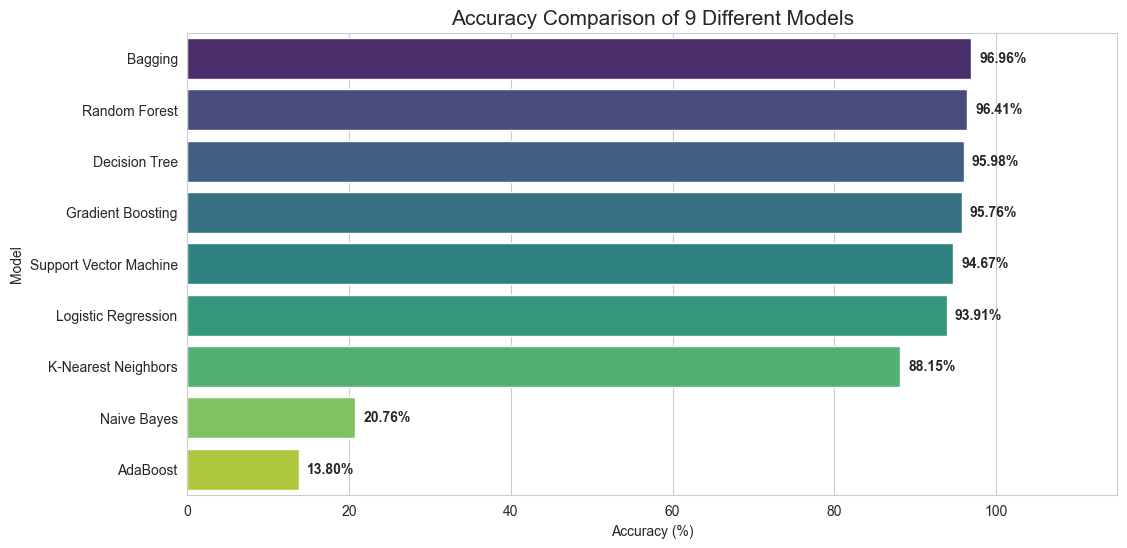

In [16]:
# Cell 8: The Model Showdown (9 Models)

# 1. Import Classifiers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline # <--- Key for handling text inputs automatically

# 2. Define Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# 3. Train Loop
results = []
print("⏳ Training 9 models... This might take a minute or two.\n")

for name, model in models.items():
    try:
        # Create Pipeline: Preprocess (Scale/Encode) -> Then Train Model
        clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', model)])
        
        # Fit and Predict
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # Calculate Accuracy
        acc = accuracy_score(y_test, y_pred)
        results.append({'Model': name, 'Accuracy': acc * 100})
        print(f"   ✅ {name} finished.")
        
    except Exception as e:
        print(f"   ❌ {name} Failed: {e}")

# 4. Create Results DataFrame
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\n🏆 --- MODEL PERFORMANCE LEADERBOARD --- 🏆")
display(results_df)

# 5. Visualize with Value Labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')

# Add percentage numbers next to bars
for index, value in enumerate(results_df['Accuracy']):
    plt.text(value + 1, index, f"{value:.2f}%", va='center', fontsize=10, fontweight='bold')

plt.title('Accuracy Comparison of 9 Different Models', fontsize=15)
plt.xlabel('Accuracy (%)')
plt.xlim(0, 115) # Make room for text
plt.show()

In [18]:
# Cell 9: Save Model & Data Dictionary (Updated)
import joblib

# 1. Re-create the pipeline with the Winner (Bagging)
# (Ensure 'preprocessor' is defined from Cell 7)
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier()) # The winner!
])

# 2. Train on the Full Training Set
print("⏳ Finalizing the model...")
final_pipeline.fit(X_train, y_train)

# 3. Save the Model
joblib.dump(final_pipeline, 'crop_model_final.pkl')

# --- THE NEW PART IS HERE ---
# 4. Create State -> District Mapping
# This tells the App: "If user selects Punjab, ONLY show Ludhiana, Amritsar..."
state_district_map = df.groupby('state')['district'].unique().apply(list).to_dict()

# 5. Save all options
unique_values = {
    'states': sorted(df['state'].unique().tolist()),
    'state_district_map': state_district_map,  # <--- Added this map
    'soil_types': sorted(df['soil_type'].unique().tolist())
}
joblib.dump(unique_values, 'unique_values.pkl')

print("\n✅ SUCCESS!")
print("1. Model saved as: 'crop_model_final.pkl'")
print("2. Dropdown data (with mapping) saved as: 'unique_values.pkl'")

⏳ Finalizing the model...

✅ SUCCESS!
1. Model saved as: 'crop_model_final.pkl'
2. Dropdown data (with mapping) saved as: 'unique_values.pkl'
